# Python script for plotting

In [1]:
from matplotlib import pyplot as plt
from matplotlib import cycler
from matplotlib import cm
import pandas as pd
from astropy.io import ascii
import numpy as np

## read the data

In [2]:
path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/"
filename = "Temp_E_newM_nonperiodic_J10.0_0.25_Q16_sweep1000000.txt"
df=ascii.read(path + filename)

In [3]:
df['col1']

0.01
0.030204081632653063
0.05040816326530612
0.07061224489795918
0.09081632653061225
0.1110204081632653
0.13122448979591836
0.15142857142857144
0.1716326530612245
0.19183673469387755
0.2120408163265306


In [4]:
colnames = [0.0,0.05,	0.1,	0.15,	0.2,	0.25,	0.3,	0.35,	0.4,	0.45,	0.5,	0.55,	0.6,	0.65,	0.7,	0.75,	0.8,	0.85,	0.9,	0.95,	1.0,	1.05,	1.1,	1.15]

## make a plot

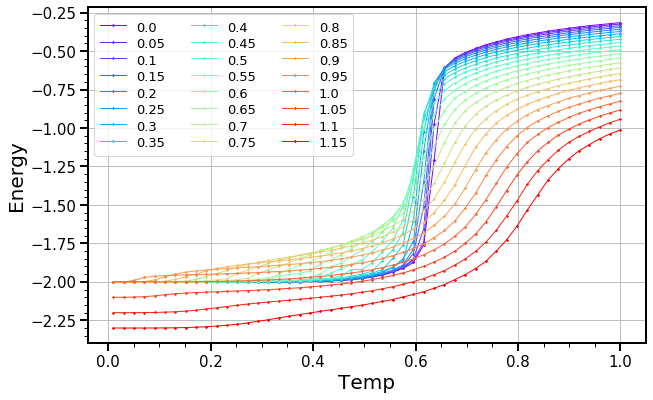

In [5]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
plt.rcParams['axes.prop_cycle'] = custom_cycler
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 13,
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':12,
         'ytick.labelsize':12,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}

plt.rcParams.update(params)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))

ax = axs
for index, colname in enumerate(colnames):
    #ax.plot(df['col'+str(index*2+1)], df['col'+str(index*2+2)], '-*', markersize=2, linewidth=1, 
    #        color = (index*1/24, 1-index*1/24, 1-index*1/24), label=str(colname), alpha=1)
    ax.plot(df['col'+str(index*2+1)], df['col'+str(index*2+2)], '-*', markersize=2, linewidth=1, 
            color = cm.rainbow(index/23.), label=str(colname), alpha=1)
    #ax.plot(df['col'+str(index*2+1)], df['col'+str(index*2+2)], style_kwargs=custom_cycler[index])

ax.legend(ncol=3, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True)
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel(r'Temp', size=20)
ax.set_ylabel(r'Energy', size=20)
ax.minorticks_on()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
ax.grid(True)


fig.savefig('test.png', format='png', dpi=600)

## Exponent vs T plots

In [65]:
path = "E:/UC Davis/Research/Synthetic Dimensions/Synthetic_dim_code/M2_graph_newM_rev/"

mainplot_filename = "exponent_vs_T.txt"
df=ascii.read(path + mainplot_filename)

subplot_filenames = ["Q=16_T=0.01_J1=0.85lnM2_vs_lnN", "Q=16_T=0.39387755102040817_J1=0.85lnM2_vs_lnN", "Q=16_T=0.656530612244898_J1=0.85lnM2_vs_lnN", "Q=16_T=1.0_J1=0.85lnM2_vs_lnN"]
df_sub = []
for index,filename in enumerate(subplot_filenames):
    df_sub.append(ascii.read(path + filename + ".txt")) 
    
fitted_params = [[0.0, 0.0],[-0.10025204352381681, -0.4548537072960146],[-0.4126451942667583, 0.2256947068612906], [-0.9976059157329533, 0.5215991703478714]]

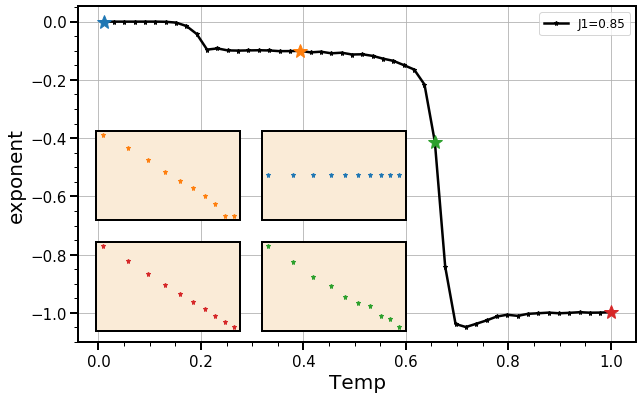

In [47]:
from matplotlib import pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 12,
          'figure.figsize': (15, 5),
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}
plt.rcParams.update(params)
ax = axs
ax.plot(df["Temp"], df["J1=0.85"], '-*', markersize=5, linewidth=2.5, 
            color = 'k', label = "J1=0.85")
ax.plot(df["Temp"][0], df["J1=0.85"][0], '*', markersize=15, 
            color = colors[0])
ax.plot(df["Temp"][19], df["J1=0.85"][19], '*', markersize=15, 
            color = colors[1])
ax.plot(df["Temp"][32], df["J1=0.85"][32], '*', markersize=15, 
            color = colors[2])
ax.plot(df["Temp"][49], df["J1=0.85"][49], '*', markersize=15, 
            color = colors[3])

# this is an inset axes over the main axes
ax1 = fig.add_axes([.38, .4, .2, .2], facecolor='antiquewhite')
ax1.plot(df_sub[0]["col1"], df_sub[0]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[0])
ax1.set(xticks=[], yticks=[])
# this is another inset axes over the main axes
ax2 = fig.add_axes([.15, .4, .2, .2], facecolor='antiquewhite')
ax2.plot(df_sub[1]["col1"], df_sub[1]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[1])
ax2.set(xticks=[], yticks=[])
ax3 = fig.add_axes([.38, .15, .2, .2], facecolor='antiquewhite')
ax3.plot(df_sub[2]["col1"], df_sub[2]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[2])
ax3.set(xticks=[], yticks=[])
ax4 = fig.add_axes([.15, .15, .2, .2], facecolor='antiquewhite')
ax4.plot(df_sub[3]["col1"], df_sub[3]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[3])
ax4.set(xticks=[], yticks=[])
ax.legend()
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel('Temp', size=20)
ax.set_ylabel('exponent', size=20)
ax.minorticks_on()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
ax.grid(True)

fig.savefig('Q=16_T=0.01_0.39_0.65_1.0_J1=0.85_lnM2_vs_lnN.png', format='png', dpi=600)

E:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


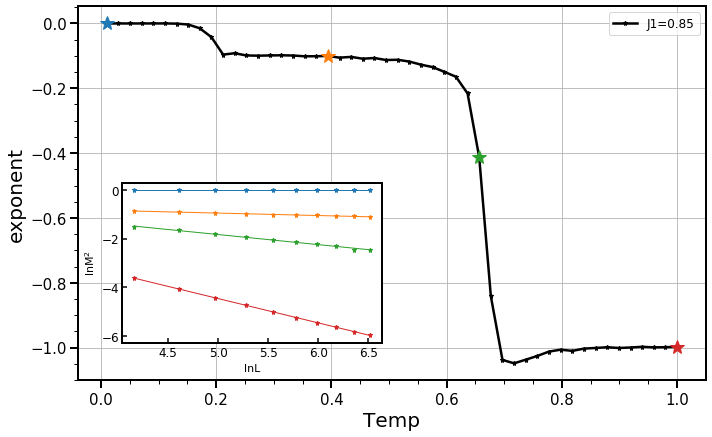

In [97]:
from matplotlib import pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6.18))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 12,
          'figure.figsize': (15, 5),
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}
plt.rcParams.update(params)
ax = axs
ax.plot(df["Temp"], df["J1=0.85"], '-*', markersize=5, linewidth=2.5, 
            color = 'k', label = "J1=0.85")
ax.plot(df["Temp"][0], df["J1=0.85"][0], '*', markersize=15, 
            color = colors[0])
ax.plot(df["Temp"][19], df["J1=0.85"][19], '*', markersize=15, 
            color = colors[1])
ax.plot(df["Temp"][32], df["J1=0.85"][32], '*', markersize=15, 
            color = colors[2])
ax.plot(df["Temp"][49], df["J1=0.85"][49], '*', markersize=15, 
            color = colors[3])

# this is an inset axes over the main axes
ax1 = fig.add_axes([.175, .22, .36, .36], facecolor='white')
ax1.plot(df_sub[0]["col1"], df_sub[0]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[0])
ax1.plot(df_sub[1]["col1"], df_sub[1]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[1])
ax1.plot(df_sub[2]["col1"], df_sub[2]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[2])
ax1.plot(df_sub[3]["col1"], df_sub[3]["col2"], '*', markersize=5, linewidth=1, 
            color = colors[3])
lnL = np.linspace(min(df_sub[0]["col1"]), max(df_sub[0]["col1"]), 10)
for index, value in enumerate(fitted_params):
    ax1.plot(lnL, lnL*value[0]+value[1], linewidth=1, 
            color = colors[index])

ax1.tick_params(axis = 'both', which = 'major', direction="in", labelsize = 12, length = 5, width = 1.5)
ax1.set_xlabel('lnL', size=11)
ax1.set_ylabel(r'ln$\rm M^2$', size=11)
#ax1.yaxis.set_label_position("right")
#ax1.xaxis.set_label_position("top")
#ax1.yaxis.tick_right()
#ax1.xaxis.tick_top()

ax.legend()
#ax.set_xlim(0, 1)
#ax.set_ylim(60, 80)
ax.set_xlabel('Temp', size=20)
ax.set_ylabel('exponent', size=20)
ax.minorticks_on()
ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
ax.grid(True)
#ax.text(.5,-.5,'hello')

fig.tight_layout()

fig.savefig('Q=16_T=0.01_0.39_0.65_1.0_J1=0.85_lnM2_vs_lnN_alt.png', format='png', dpi=600)

## Making a plot of E,C and Binder over different L

In [2]:
path = "D:/UC Davis/Research/Synthetic Dimension/Synthetic_dim_code/data_in_text/"

filenames = ["nonperiodic_L=8_Binder","nonperiodic_L=12_Binder","nonperiodic_L=16_Binder"]

df_sub = []
for index,filename in enumerate(filenames):
    df_sub.append(ascii.read(path + filename + ".txt"))
#df_sub[1]

In [3]:
colnames = []
num_col = len(df_sub[0].keys())
for index in range(int(num_col/2)):
    colnames.append([df_sub[0].keys()[index*2], df_sub[0].keys()[index*2+1]])


D:\Softwares\AAA Basic Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\Softwares\AAA Basic Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\Softwares\AAA Basic Softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

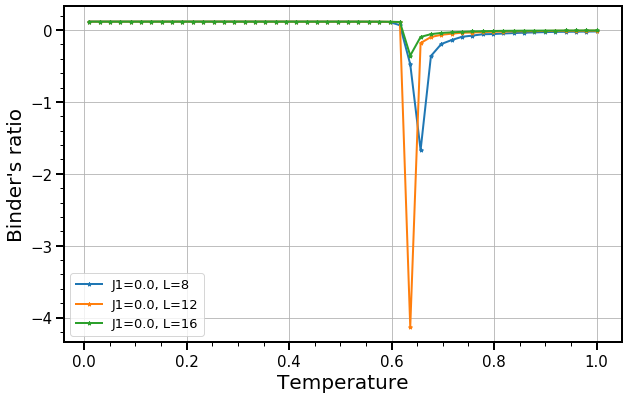

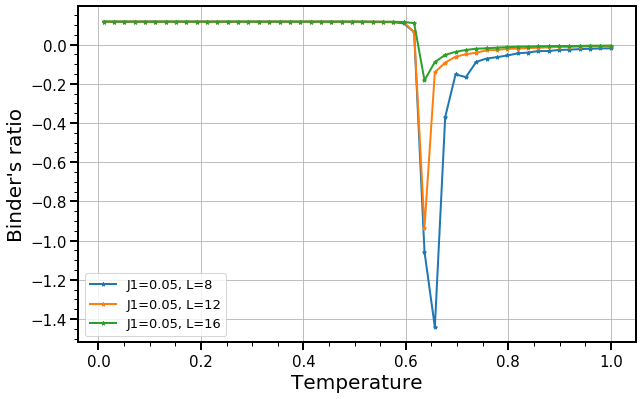

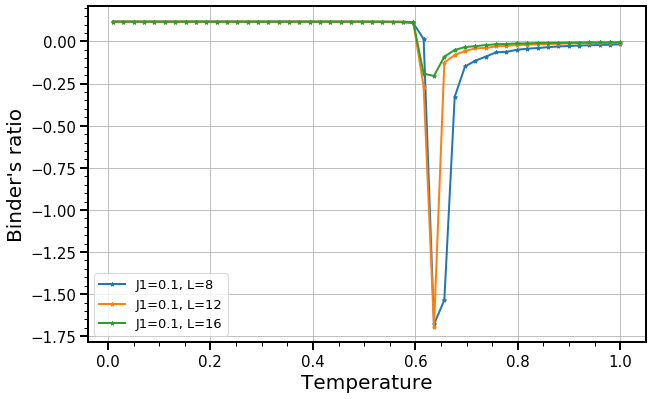

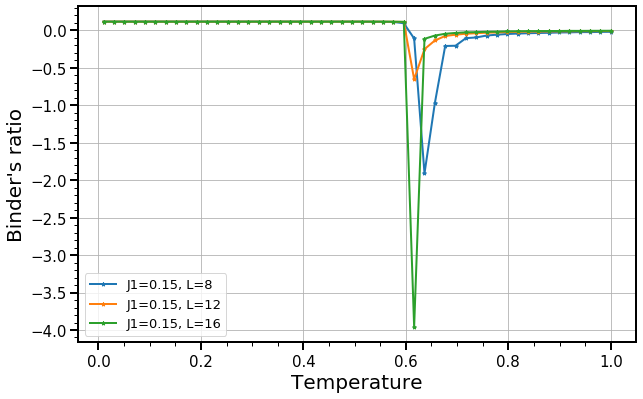

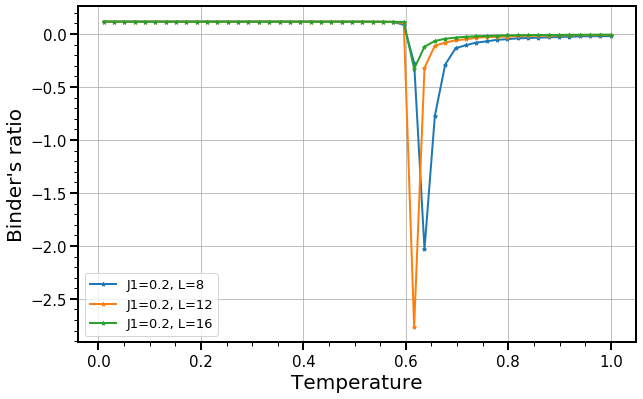

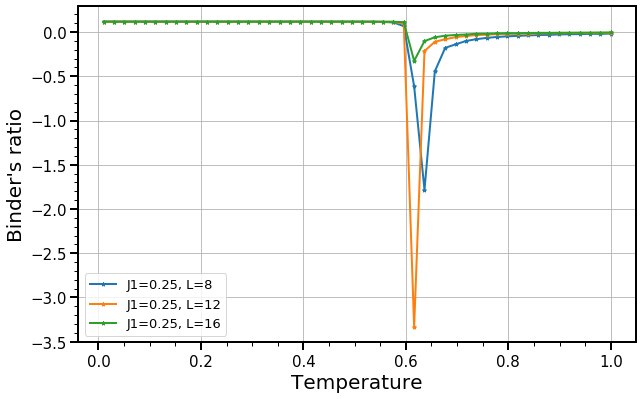

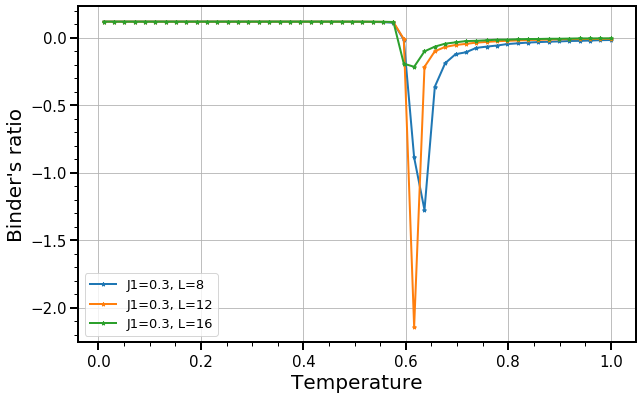

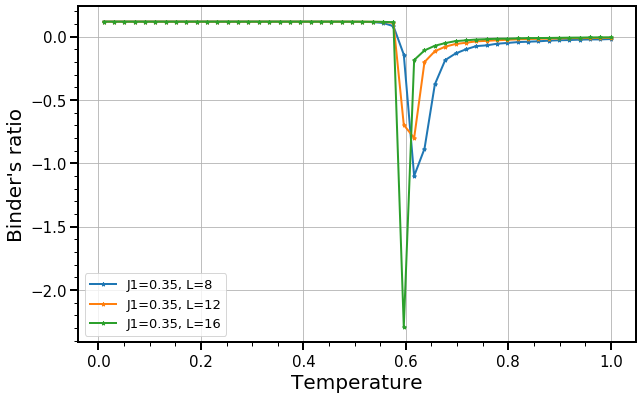

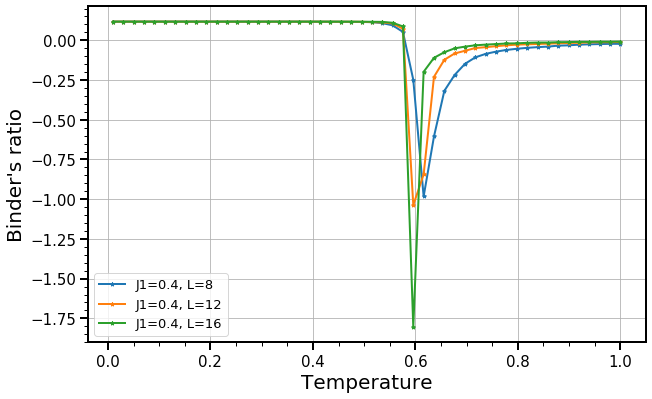

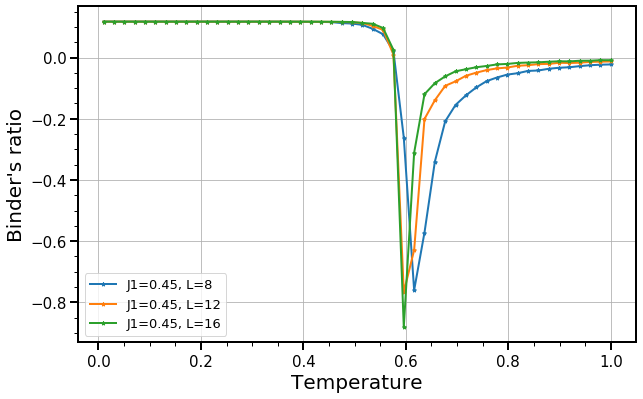

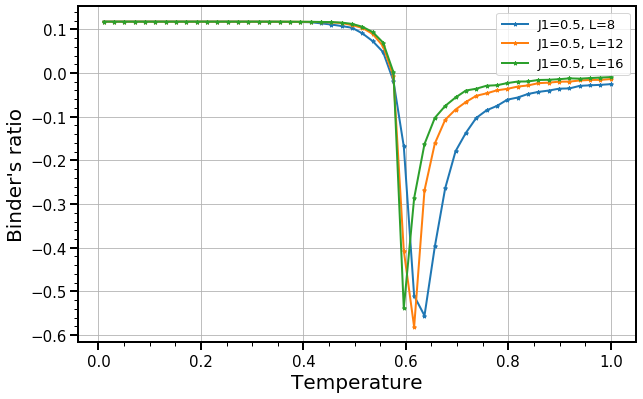

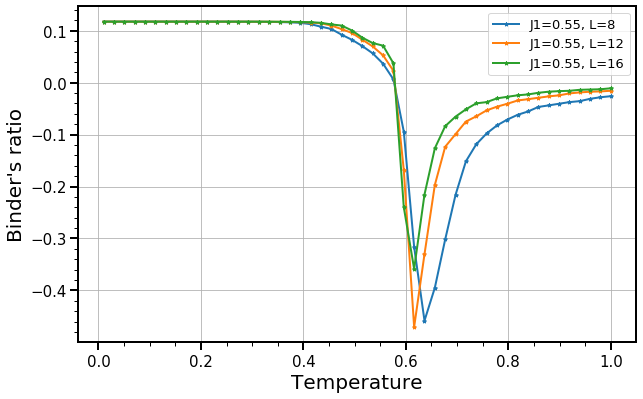

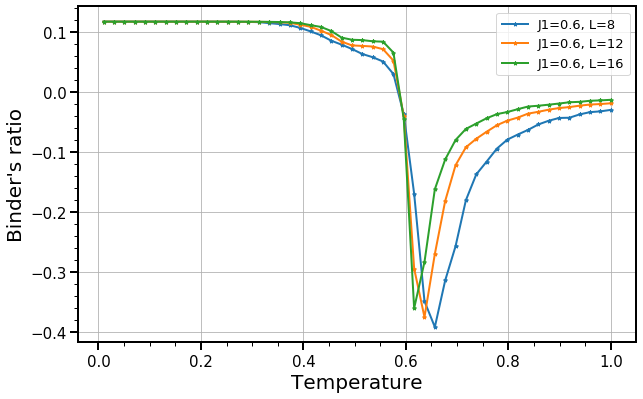

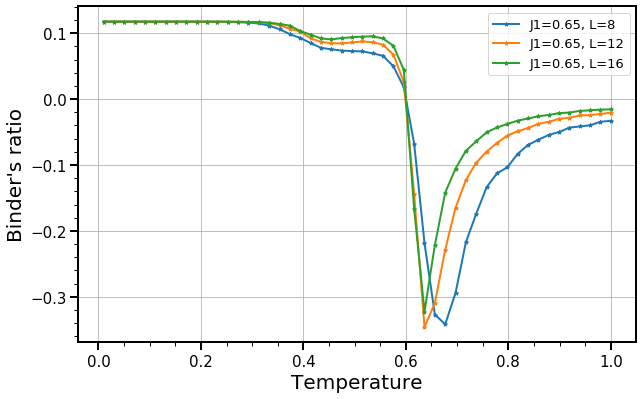

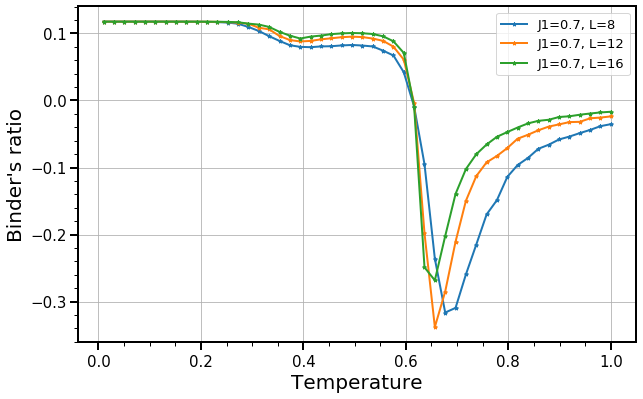

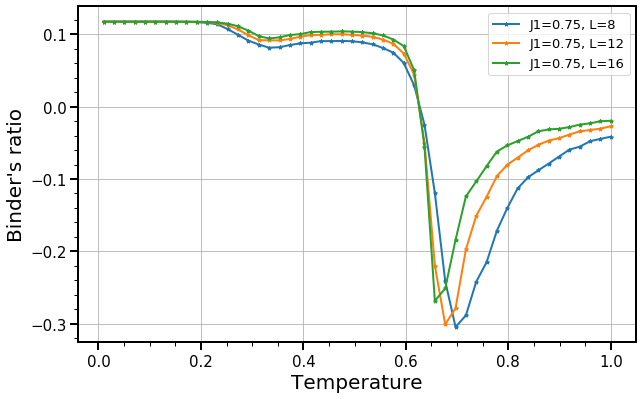

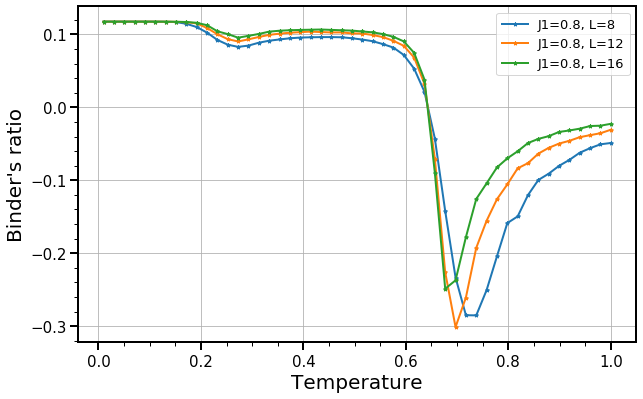

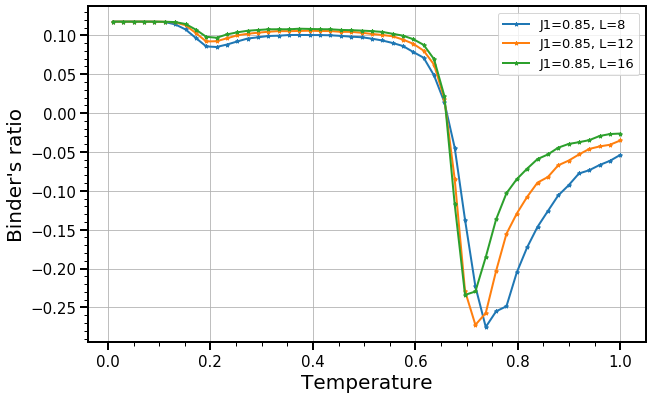

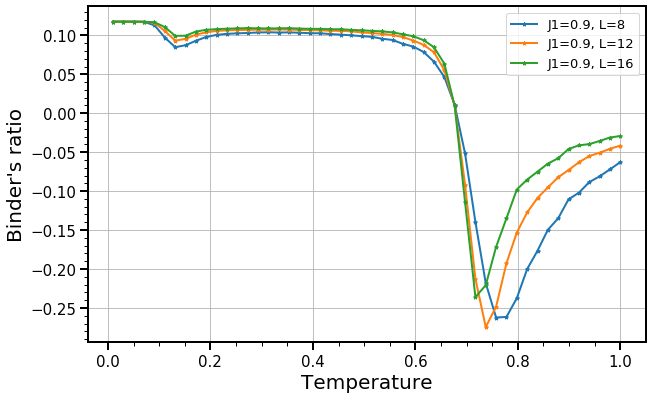

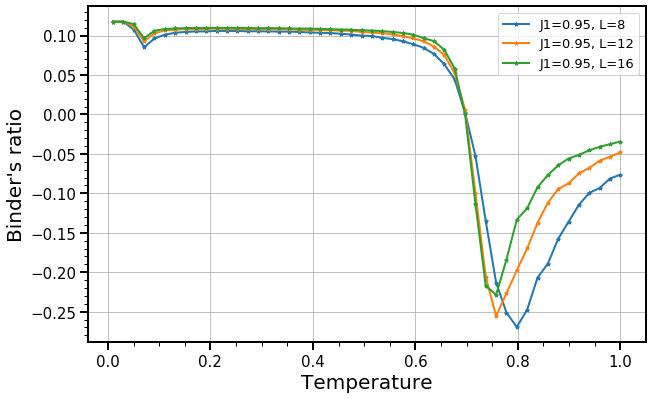

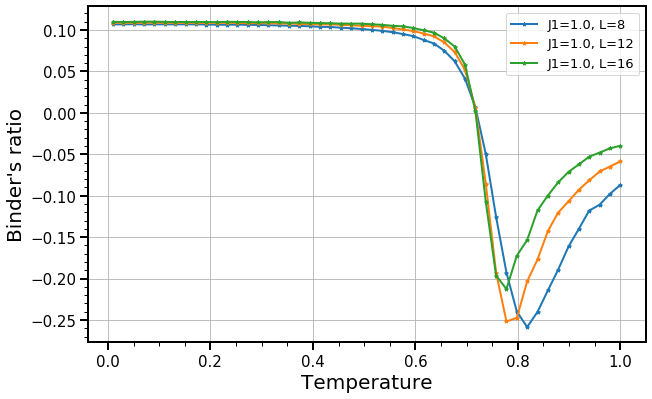

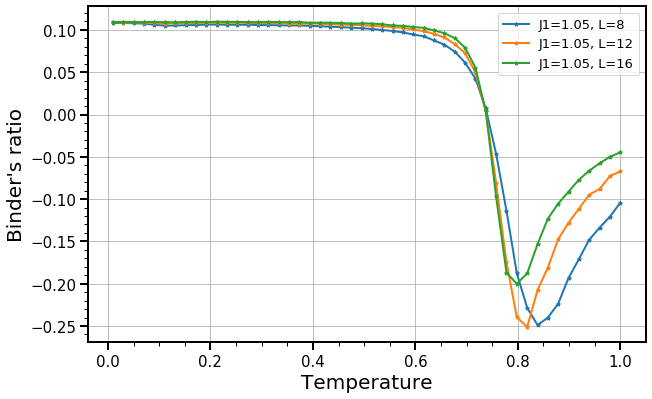

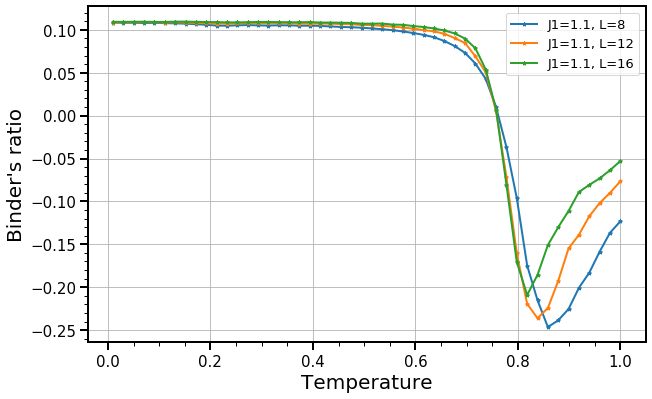

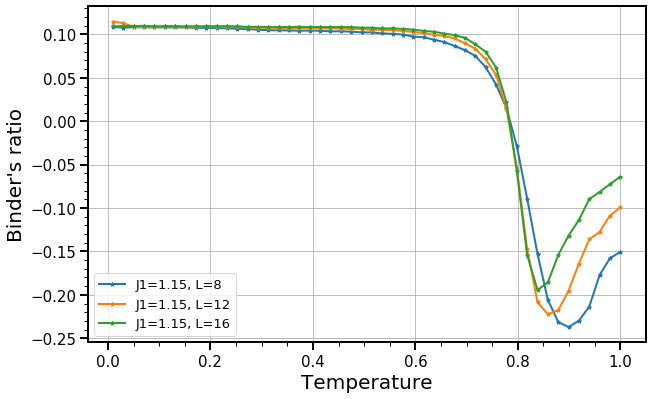

In [4]:
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)
plt.rcParams['axes.prop_cycle'] = custom_cycler
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 13,
                 'axes.labelsize': 15,
                 'axes.titlesize':20,
                 'xtick.labelsize':12,
                 'ytick.labelsize':12,
                 'ytick.major.size': 5.5,
                 'axes.linewidth': 2}

plt.rcParams.update(params)

Ls = ['8','12','16']
for J1_index,colname in enumerate(colnames):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))
    ax = axs
    for L_index, df in enumerate(df_sub):

        label="J1="+colname[0].replace('Temp_','')+', L='+Ls[L_index]
        ax.plot(df[colnames[J1_index][0]], df[colnames[J1_index][1]], '-*', markersize=4, 
                linewidth=2, 
                color = colors[L_index], 
                label=label, alpha=1)

        #ax.legend(ncol=1, handleheight=1.5, labelspacing=0.05, loc='upper left', frameon=True)
    ax.legend()
    #ax.set_xlim(0, 1)
    #ax.set_ylim(60, 80)
    ax.set_xlabel(r'Temperature', size=20)
    ax.set_ylabel(r"Binder's ratio", size=20)
    ax.minorticks_on()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
    ax.grid(True)
    fig.savefig('./paper_plots/B_plots/'+"B_"+"J1="+colname[0].replace('Temp_','')+'.png', format='png', dpi=600)
    #break

In [ ]:
J1_vals = [0.0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45,
           0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00, 1.05, 1.10, 1.15]